In [1]:
%config Completer.use_jedi = False # To make auto-complete faster

#Reloads imported files automatically
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('../utils/')

In [4]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:87% !important; }</style>"))

In [2]:
import pandas as pd
import numpy as np
import time

import pynbody

In [ ]:
import matplotlib.pyplot as plt

from matplotlib_params import set_matplotlib_params,reset_rcParams
set_matplotlib_params()

In [3]:
import miscellaneous_functions as MF
import mixed_plots as MP
import from_sim_to_numpy as sim_to_np

In [5]:
general_path = '/Users/luismi/Desktop/MRes_UCLan/'

# 708main

In [6]:
simulation_path = general_path+"data/708main_simulation/run708main.01000.gz"

In [7]:
R0=8.1

save_path = general_path + f"data/708main_simulation/numpy_arrays/R0_{R0}/"
MF.create_dir(save_path)

print(save_path)

/Users/luismi/Desktop/MRes_UCLan/708main_simulation/numpy_arrays/R0_8.1/


In [8]:
#min_angle = 0
#max_angle = 90
#step = 90
#angle_list = np.arange(min_angle, max_angle + step, step)
#angle_list = np.append(angle_list, 27)

angle_list = [27] #[0,15,20,25,27,30,35,40,45,90]
print(angle_list)

[27]


In [10]:
pos_factor = 1.7
zabs = True
GSR = True

axisymmetric = False

In [11]:
start = time.time()
sim_to_np.load_process_and_save(simulation_path, save_path, angle_list=angle_list, pos_factor=pos_factor, zabs=zabs, GSR=GSR,R0=R0,axisymmetric=axisymmetric)
stop = time.time()

Mirroring everything from below the plane to above it

Saved: /Users/luismi/Desktop/MRes_UCLan/708main_simulation/numpy_arrays/R0_8.1/708MWout_bar27_scale1.7_8.1R0
Saved: /Users/luismi/Desktop/MRes_UCLan/708main_simulation/numpy_arrays/R0_8.1/columns


## Step by step

### Load

In [24]:
sim = sim_to_np.load_pynbody_sim(simulation_path)

In [25]:
def extract_xyz_df_from_sim_stars(stars):
    x = np.array(stars['pos'].in_units('kpc'))[:,0]
    y = np.array(stars['pos'].in_units('kpc'))[:,1]
    z = np.array(stars['pos'].in_units('kpc'))[:,2]

    df = pd.DataFrame()
    df["x"] = x
    df["y"] = y
    df["z"] = z
    
    return df

def get_bar_stars(stars, tform_min=3, tform_max=6, zmin=0.2):
    tform_min, tform_max = 3,6 # choose stars that between 4 and 7 Gyr old
    zmin = 0.2 # to avoid the spheroidal densest region in the plane

    return stars[(stars['tform'] > tform_min) & (stars['tform'] < tform_max) & (np.abs(stars['z']) > zmin)]

60.42449417154822


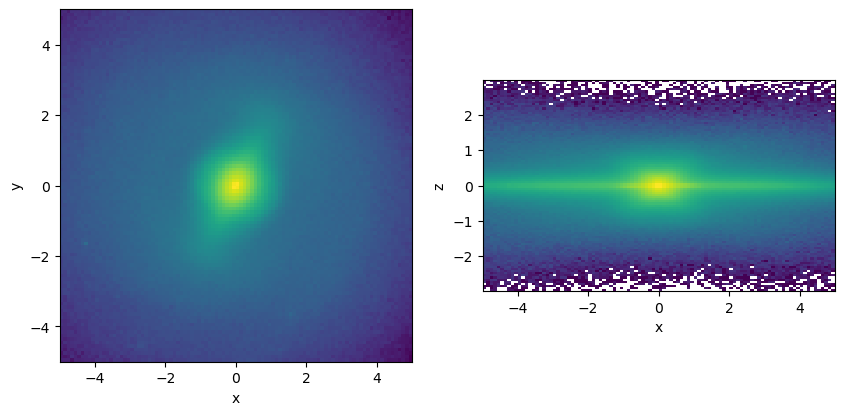

In [26]:
print(sim_to_np.calculate_bar_angle_from_inertia_tensor(*sim_to_np.extract_xymass_from_stars(sim.s)))
MP.quick_show_xy_xz(extract_xyz_df_from_sim_stars(sim.s))

62.63458824841588


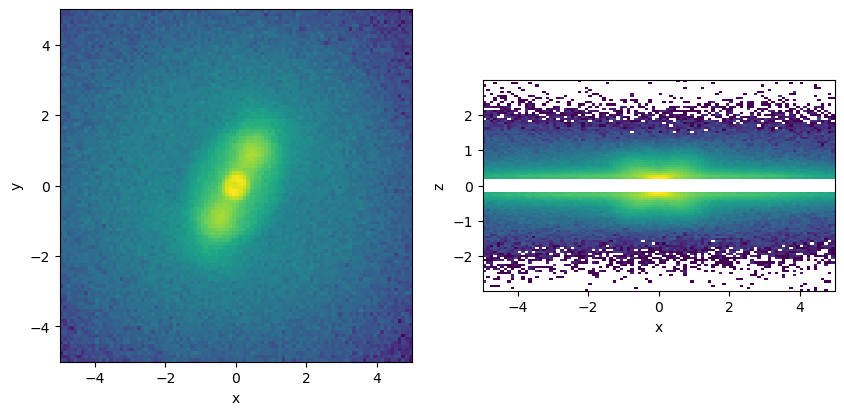

In [27]:
bar_stars = get_bar_stars(sim.s)
print(sim_to_np.calculate_bar_angle_from_inertia_tensor(*sim_to_np.extract_xymass_from_stars(bar_stars)))
MP.quick_show_xy_xz(extract_xyz_df_from_sim_stars(bar_stars))

### Non-axisymmetric only

#### Align

177.7899059231323


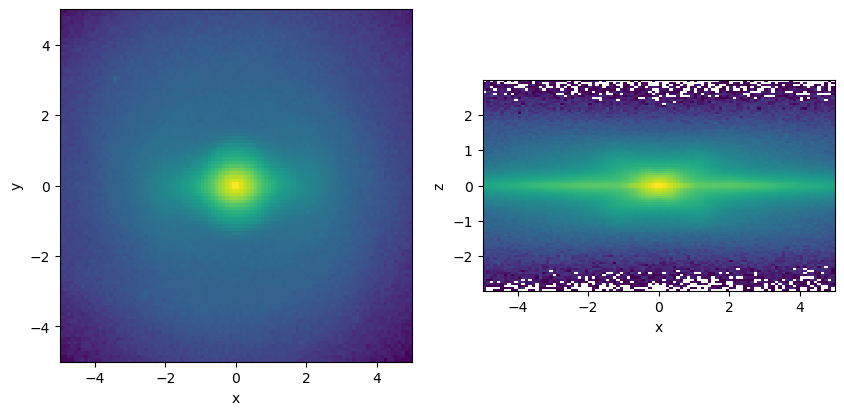

In [288]:
# Rotating in-place because I could not find a way to deep-copy the simulation - see https://stackoverflow.com/questions/58415397/

sim_to_np.align_bar_x_axis(sim)

print(sim_to_np.calculate_bar_angle_from_inertia_tensor(*sim_to_np.extract_xymass_from_stars(sim.s)))

MP.quick_show_xy_xz(extract_xyz_df_from_sim_stars(sim.s))

0.0


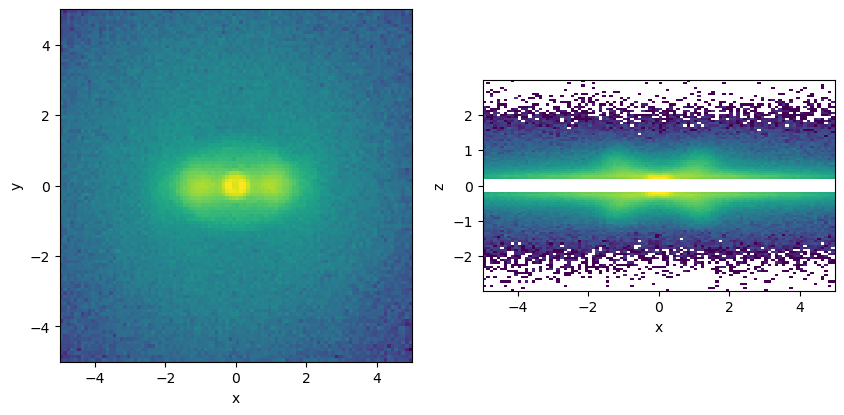

In [289]:
rotated_bar_stars = get_bar_stars(sim.s)

print(sim_to_np.calculate_bar_angle_from_inertia_tensor(*sim_to_np.extract_xymass_from_stars(rotated_bar_stars)))

MP.quick_show_xy_xz(extract_xyz_df_from_sim_stars(rotated_bar_stars))

#### Rotate by bar angle

-155.21009407686782


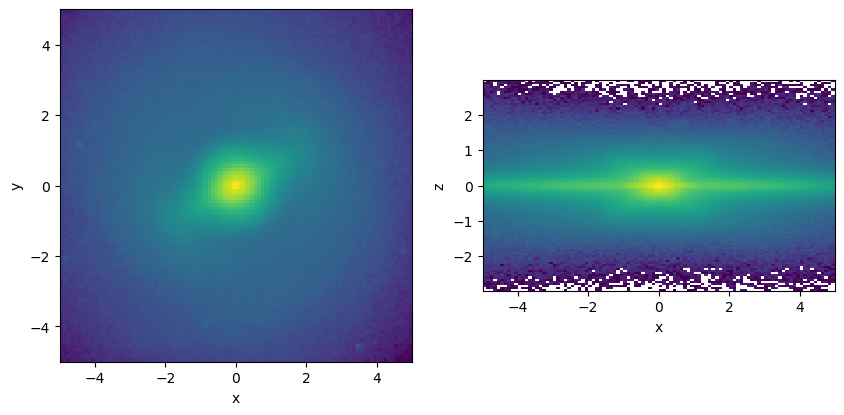

In [294]:
bar_angle = 27

sim.rotate_z(bar_angle)

print(sim_to_np.calculate_bar_angle_from_inertia_tensor(*sim_to_np.extract_xymass_from_stars(sim.s)))

MP.quick_show_xy_xz(extract_xyz_df_from_sim_stars(sim.s))

### Convert to df

In [33]:
axisymmetric = True
# axisymmetric = False

if axisymmetric:
    bar_angle = 27 # whatever

In [34]:
df = sim_to_np.convert_sim_to_df(sim, angle=bar_angle, axisymmetric=axisymmetric)

In [35]:
df.head()

,z,vz,age,R,phi,vR,vphi,x,y,vx,vy,l,b,d,vr,vl,vb,vM,vm
0,0.137616,-69.565891,9.991250,0.154460,33.925810,-131.884307,193.203297,0.128165,0.086207,-217.262869,86.705420,0.600325,0.958045,8.229767,-217.475589,89.046966,-65.990733,-232.946071,-21.380184
1,0.753446,-73.414085,9.990625,1.642329,355.676849,57.151779,-63.475311,1.637656,-0.123801,52.204295,-67.602903,-0.728341,4.423981,9.767546,47.238398,-66.986744,-77.349152,77.205443,-36.534374
2,0.526884,-97.370278,9.990625,0.755739,114.425430,-151.794228,-69.022602,-0.312504,0.688100,125.613311,-109.667239,5.049579,3.855539,7.835571,108.664466,-120.392807,-104.997288,161.710165,-40.686976
3,0.558814,-59.637631,9.990625,0.292649,196.015336,-9.431384,-109.149425,-0.281290,-0.080740,-21.048410,107.515173,-0.591586,4.087760,7.839070,-26.352433,107.376715,-57.952272,-67.565138,86.240942
4,0.430474,-62.618893,9.990625,0.213331,144.860694,-156.545982,52.912924,-0.174453,0.122786,97.561368,-133.372416,0.887641,3.108495,7.938179,91.947425,-134.974275,-67.757926,147.477625,-74.543759


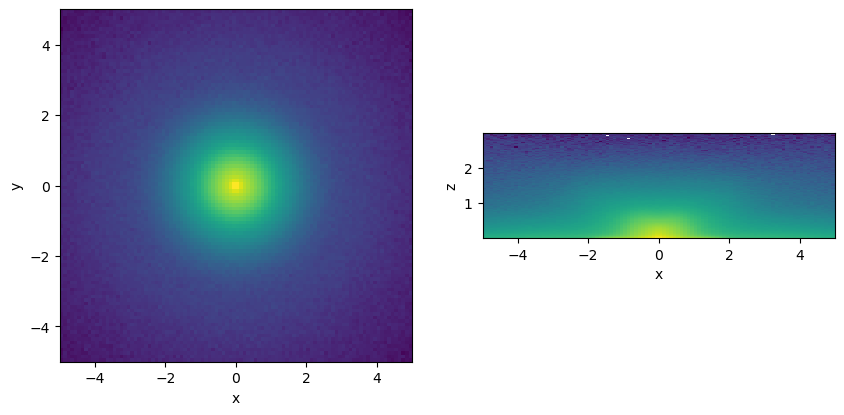

In [36]:
MP.quick_show_xy_xz(df)

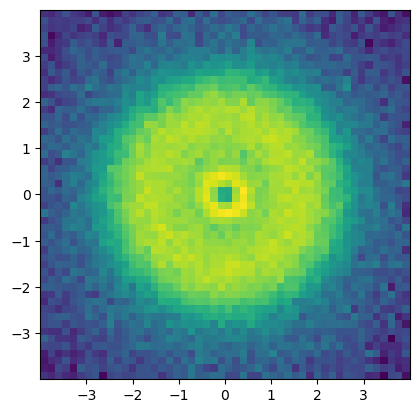

In [37]:
MP.visually_inspect_bar_angle(df, zmin=0.5,age_lims=[4,7],bar_angle=bar_angle if not axisymmetric else None)

## Load numpy
Just to test the saved file came out as expected

In [40]:
import load_sim

In [41]:
dummy_df = pd.DataFrame([[1,2],[4,3]],columns=['a','b'])

In [42]:
print(general_path)

/Users/luismi/Desktop/MRes_UCLan/


In [43]:
R0 = 8.1

np_path = general_path+f"data/708main_simulation/numpy_arrays/R0_{R0}/"

**Non-axisymmetric**

In [14]:
df0 = load_sim.load_simulation(np_path,GSR=GSR,R0=R0,zabs=zabs,pos_factor=pos_factor,axisymmetric=False)

708MWout_bar27_scale1.7_8.1R0.npy loaded successfully.


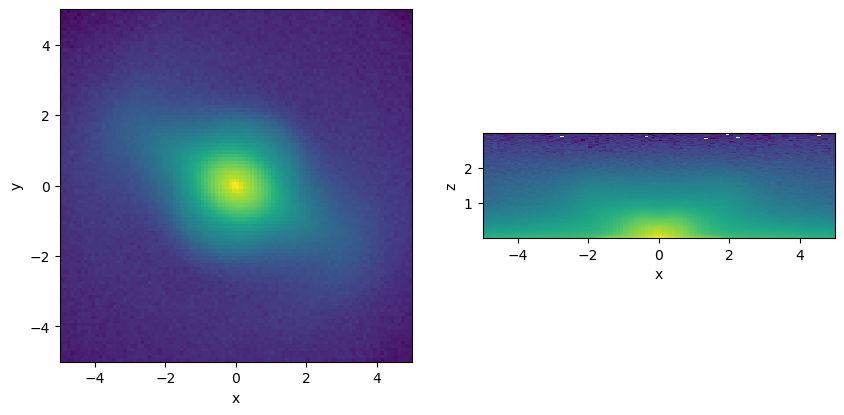

In [15]:
MP.quick_show_xy_xz(df=df0)

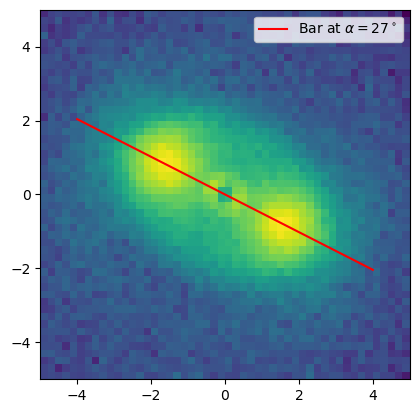

In [16]:
MP.visually_inspect_bar_angle(df0, xymax=5, zmin=0.5, age_lims=[4,7],bins=50, bar_angle=27)

**Axisymmetrise here**

In [ ]:
sim_to_np.axisymmetrise(df0)


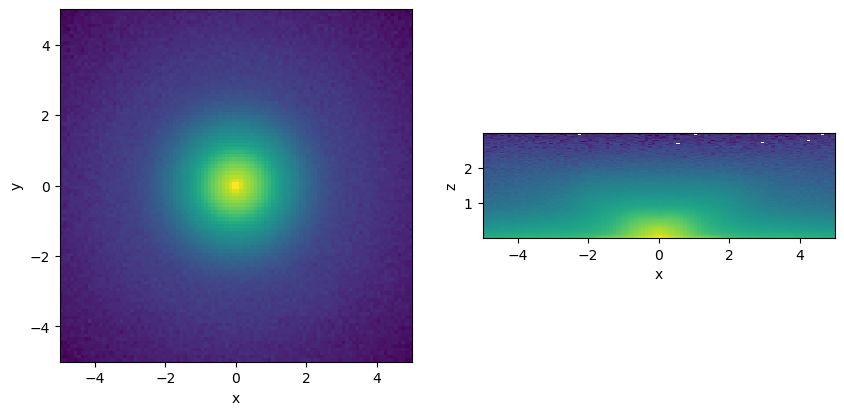

In [18]:
MP.quick_show_xy_xz(df0)

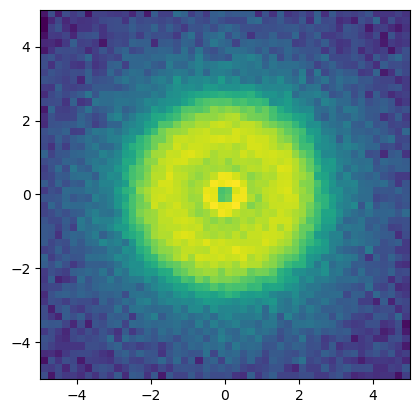

In [20]:
MP.visually_inspect_bar_angle(df0, xymax=5,zmin=0.5,age_lims=[4,7],bins=50)

**Load axisymmetric**

In [47]:
axi_df = load_sim.load_simulation(np_path,GSR=GSR,R0=R0,zabs=zabs,pos_factor=pos_factor,axisymmetric=True)

708MWout_scale1.7_8.1R0_axisymmetric.npy loaded successfully.


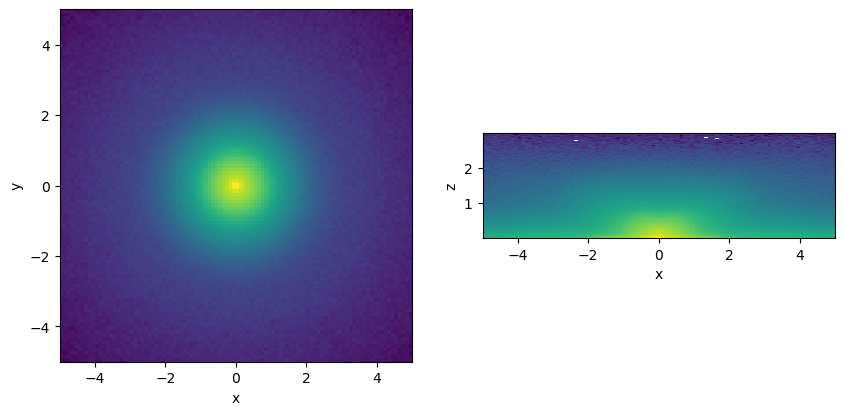

In [48]:
MP.quick_show_xy_xz(axi_df)

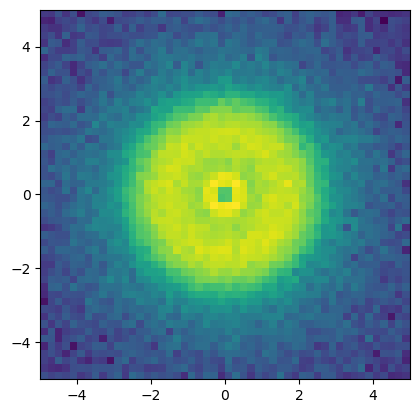

In [49]:
MP.visually_inspect_bar_angle(axi_df, xymax=5,zmin=0.5,age_lims=[4,7],bins=50)

# Joao

In [66]:
joao_path = '/home/luismi98/MRes_UCLan/dwarfM06Y193/'
accreted_filepath = '/home/luismi98/MRes_UCLan/dwarfM06Y193Zn51Vx30Rotn15x_pid_accreted.npy'

save_path = '/home/luismi98/MRes_UCLan/joao_numpy_arrays/'

In [67]:
filename = 'jrun002.dwarfM06Y193Zn51Vx30Rotn15x.01000.gz'

load_path = joao_path+filename

In [68]:
# Load and align
joao_sim = pynbody.load(load_path)
joao_sim.physical_units()
pynbody.analysis.angmom.faceon(joao_sim.stars)

pynbody.plot.stars.render(joao_sim.s, width='15 kpc')
plt.savefig(save_path+filename+'.png',dpi=300)

In [69]:
indexes = np.arange(0,len(joao_sim.s),1)
joao_sim.s['pid'] = indexes

pid_acc = np.load(accreted_filepath)

accreted = np.isin(joao_sim.s['pid'], pid_acc)
joao_sim.s['accreted'] = accreted

print(np.sum(accreted)*100/len(joao_sim.s['pid']),"% are accreted")

0.4342741085958822 % are accreted


In [75]:
joao_df = pd.DataFrame()

for key in joao_sim.s.keys():
    if key in ['vel','pos','eps']: continue
    joao_df[key] = np.array(joao_sim.s[key])
    
joao_df['age'] = joao_df['tform'].max() - joao_df['tform']

In [76]:
print("The dataframe occupies",joao_df.memory_usage(index=True).sum()/10**6,"Mb")

print("The dataframe in np.float32 occupies",joao_df.astype(np.float32).memory_usage(index=True).sum()/10**6,"Mb")

The dataframe occupies 202.119707 Mb
The dataframe in np.float32 occupies 108.352892 Mb


In [77]:
columns = list(joao_df.columns)

In [78]:
#savetype = np.float64
savetype = np.float32

In [79]:
save_name = 'ALL_jrun002.dwarfM06Y193Zn51Vx30Rotn15x.01000.npy'

np.save(save_path + save_name, np.array(joao_df.values.astype(savetype)))

print("Saved as type",savetype)

Saved as type <class 'numpy.float32'>


In [80]:
with open(save_path + 'columns.txt', 'w') as f:
    string = f"Saved simulation with datatype {savetype}.\nThe columns are:{columns}"
    f.write(string)